# Aproximación de funciones:
Implementar un perceptrón multicapa para aproximar la función f(x) = 0.5.sin(a.cos(x)).cos(2x) + 0.25.sin(x) en el intervalo x ∈ [0; 2π]. Generar conjuntos
de datos de distintos tamaños tomando valores a intervalos regulares o con una
distribución aleatoria uniforme.
Entrenar la red y analizar los resultados teniendo en cuenta las siguientes
variantes.
1. Para valores de a = 4, a = 8 y a = 16.
2. Con distintas cantidades de datos y de unidades ocultas.
3. Con entrenamiento incremental y por lotes.
4. Con y sin validación

Testear la capacidad de generalización comparando la función conocida junto a
la obtenida por la red:

1. Entrenando con una pequeña perturbación de error en la entrada y/o la
salida.
2. Considerando casos de interpolación y extrapolación


In [1]:
import numpy as np
from testing_utils import FuncionSigmoidea
from matplotlib import pyplot as mpl
from perceptron_multicapa import PerceptronMulticapa

In [2]:
f = lambda x, a: 0.5 * np.sin(a*np.cos(x)) * np.cos(2*x)

In [3]:
func_sigmoidea = FuncionSigmoidea()
lin = lambda x: x
const = lambda x: 1
sig = func_sigmoidea.getG('bipolar')
sig_der = func_sigmoidea.getdGdx('bipolar')

In [24]:
# porque f: R -> R
N = 1
M = 1
P = 300

In [25]:
x = np.random.uniform( 0, 2*np.pi, P)
# normalizo los datos
x = (x-x.mean(0))/np.square(x.std(0))
z = f(x, 16)

El último error es de 0.032940888345687036


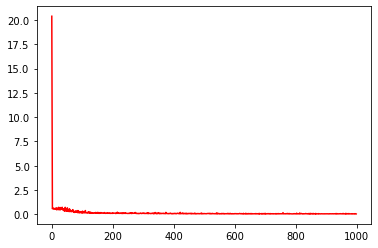

In [76]:
indexes = np.random.permutation(x.shape[0])
percentaje = int(0.05 * P)
tst = indexes[-percentaje:]
trn = indexes[:-percentaje]

pmc = PerceptronMulticapa([N, 15, 15, M], [sig, sig, sig, lin], [
                          sig_der, sig_der, sig_der, const], 0.1, 10)
E = pmc.fit(x[trn], z[trn])
print(f'El último error es de {E[-1]}')
mpl.plot(E, 'r')
mpl.show()


In [77]:
YPred = pmc.activacion(x[tst].reshape((-1, 1)))[-1][:, 0]
e = np.mean(np.square(z[tst] - YPred))
print(e)

0.0011613608010624026
